# MNIST database of handwritten digits
Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras

Using TensorFlow backend.


## Loading our dataset

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 17s 1us/step


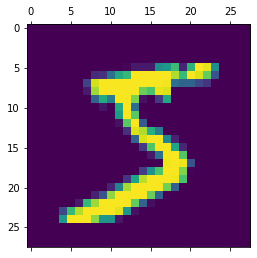

In [3]:
plt.matshow(x_train[0])

## Normalizing data

In [8]:
x_train = x_train/255
x_test = x_test/255

## Building Neural Network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [11]:
model = Sequential()

In [12]:
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(50, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

###### *we can change the no of Neurons to get great accuracy. Also selection of no. of Neuron is all based of trial.

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.3181 - accuracy: 0.9100
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.1579 - accuracy: 0.9547
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.1189 - accuracy: 0.9652
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0968 - accuracy: 0.9714
Epoch 5/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0806 - accuracy: 0.9762


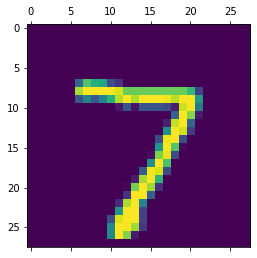

In [16]:
plt.matshow(x_test[0])

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
yp = model.predict(x_test)

In [19]:
yp[0]

array([3.4165550e-06, 1.3758431e-08, 1.9176170e-05, 7.7643467e-04,
       1.0382685e-10, 3.8824119e-06, 2.3485150e-10, 9.9919158e-01,
       4.5118832e-06, 1.0087236e-06], dtype=float32)

In [20]:
np.argmax(yp[0])

7

### Since, we are getting same no. therefore our prediction is correct.

In [21]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 36us/step


[0.1070641581337899, 0.9674000144004822]

#### My accuracy is 96.7%